# Implementation of Visual transformer

https://github.com/lucidrains/vit-pytorch

In [ ]:
!pip install vit_pytorch

In [ ]:
import torch
from vit_pytorch import ViT
from matplotlib.pyplot import imshow

v = ViT(image_size = 256, patch_size = 32,
        num_classes = 1000, dim = 1024,
        depth = 6, heads = 16,
        mlp_dim = 2048, dropout = 0.1,
        emb_dropout = 0.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


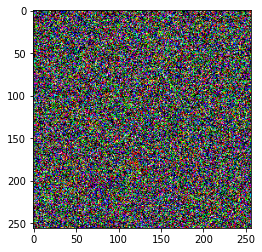

In [ ]:
img1 = img[0,:,:,:]
img1.shape
imshow(  img1.permute(1, 2, 0)  )   
#Given a Tensor representing the image,use .permute() to put the channels as the last dimension:

torch.Size([8, 8])


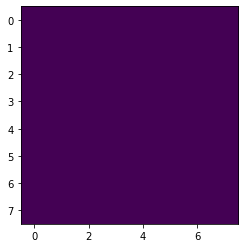

In [ ]:
mask = torch.ones(1, 8, 8).bool() # optional mask, designating which patch to attend to
mask1 = mask[0,:,:]
print(mask1.shape)
imshow(  mask1 )   

In [ ]:
img = torch.randn(1, 3, 256, 256)
mask = torch.ones(1, 8, 8).bool() # optional mask, designating which patch to attend to

preds = v(img, mask = mask) # (1, 1000)

In [ ]:
type(preds)

torch.Tensor

In [ ]:
preds.shape

torch.Size([1, 1000])

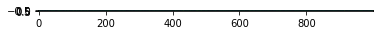

In [ ]:
imshow(  preds.permute(0,1).detach().numpy() )   

# Looking into model

https://github.com/szagoruyko/pytorchviz


In [ ]:
!pip install torchviz

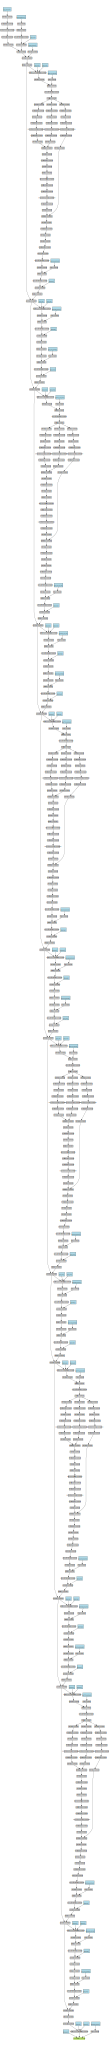

In [ ]:
from torchviz import make_dot
make_dot(preds)  #.g = Graph(format='png')  #make_dot expects a variable (i.e., tensor with grad_fn), not the model itself.

https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch

save as image

In [ ]:
image = make_dot(preds)  #.g = Graph(format='png')  #make_dot expects a variable (i.e., tensor with grad_fn), not the model itself.
image.render(filename='g1' , format = 'jpg')  #format = pdf , dot , png , jpg

In [ ]:
v

ViT(
  (patch_to_embedding): Linear(in_features=3072, out_features=1024, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): Residual(
          (fn): PreNorm(
            (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (fn): Attention(
              (to_qkv): Linear(in_features=1024, out_features=3072, bias=False)
              (to_out): Sequential(
                (0): Linear(in_features=1024, out_features=1024, bias=True)
                (1): Dropout(p=0.1, inplace=False)
              )
            )
          )
        )
        (1): Residual(
          (fn): PreNorm(
            (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (fn): FeedForward(
              (net): Sequential(
                (0): Linear(in_features=1024, out_features=2048, bias=True)
                (1): GELU()
                (2): Dropout(p=0.1, inplace=False)
     